# **Topic: “Analyzing the relationship between lifestyle, health, and sleep quality ”**

**Description of dataset:** Sleep health and lifestyle data include 400 rows and 13 columns covering a wide range of variables related to sleep and daily habits. Data include characteristics such as gender, age, occupation, sleep duration, sleep quality, physical activity level, stress level, body mass index (BMI) category, blood pressure, heart rate, number of steps per day, and presence or absence of sleep disturbances.

**Purpose of analysis:** The objective of the classification is to predict the presence or absence of sleep disturbance (categories: None, Insomnia, Sleep Apnea) based on the sleep health and lifestyle data provided. This will identify key factors influencing sleep disorders and offer recommendations to prevent them. The analysis could be useful for medical professionals, sleep researchers and even users themselves seeking to improve their sleep quality.

**Data sources:**
The data is provided on the Kaggle platform and contains information on 400 people, including demographics, sleep, activity level and health parameters. It is a synthetic dataset created for study purposes.


**Data Reference:**
[Sleep Health and Lifestyle Dataset on Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data)

**Key features of the data:**

Comprehensive Sleep Metrics: Analyzing sleep duration, sleep quality, and factors that influence sleep patterns.
Lifestyle factors: Analyzing physical activity levels, stress, and BMI categories.
Cardiovascular Health: Analyze blood pressure and heart rate.
Sleep Disorders Analysis: Determining incidences of insomnia and sleep apnea.

# Data Description

The sleep health and lifestyle data includes 400 rows and 13 columns. Data covers characteristics such as:
- Gender, age, occupation
- Sleep duration, sleep quality
- Physical activity level, stress level
- Body mass index (BMI), blood pressure
- Heart rate, number of steps per day
- Presence or absence of sleep disturbances

#### Data columns:
1. **Person ID:** Identifier for each person.
2. **Gender:** Gender of the person (Male/Female).
3. **Age:** The person's age in years.
4. **Occupation:** The person's occupation or profession.
5. **Sleep Duration (hours):** Number of hours of sleep per night.
6. **Quality of Sleep (scale: 1-10):** Subjective assessment of sleep quality.
7. **Physical Activity Level (minutes/day):** Physical Activity Level.
8. **Stress Level (scale: 1-10):** Stress level.
9. **BMI Category:** BMI Category (underweight, normal, overweight).
10. **Blood Pressure:** Blood Pressure (systolic/diastolic).
11. **Heart Rate (bpm):** Heart Rate (bpm):** Heart rate per minute.
12. **Daily Steps:** Number of steps per day.
13. **Sleep Disorder:** Presence of sleep disorders (None, Insomnia, Sleep Apnea).

Details about the Sleep Disorder column:

- **None**: The person has no diagnosed sleep disorders.
- **Insomnia** (Insomnia): Difficulty falling asleep or maintaining sleep, resulting in inadequate or poor quality sleep.
- **Sleep Apnea** (Sleep Apnea): Interruptions in breathing during sleep that disrupts sleep patterns and may pose a health risk.


**Classification Problem Statement:**

The objective is to develop a machine learning model capable of predicting the presence of sleep disorders in individuals based on their demographics, health and lifestyle parameters. Classification categories include:

- Absence of sleep disorders
- Insomnia
- Sleep apnea

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

## EDA - Analysis

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


The dataset has 219 missing values in the Sleep Disorder column. In order to process the data correctly, we will fill in these missing values with 'None' to indicate the absence of sleep disorders in these records.



In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.drop_duplicates()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Removing duplicates from the data

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Description of the results of the `describe` function

1. **Total number of records (count):** The sample contains data for 374 objects for each numeric feature.

2. **Average values (mean):**
   - **Age:** The mean age is **42 years**, indicating a predominantly adult sample.
   - **Sleep Duration:** On average, people sleep **7.13 hours per night**, which is within the normal range.
   - **Quality of Sleep:** The average subjective sleep quality score is **7.31** (on a scale of 1 to 10).
   - **Physical Activity Level:** Participants engaged in an average of **59 minutes of physical activity per day**.
   - **Stress Level:** Average stress level is **5.39** (on a scale of 1 to 10).
   - **Heart Rate:** Average heart rate is **70 beats per minute**.
   - **Number of Steps (Daily Steps):** On average, people take **6816 steps per day**.

3. **Minimum and maximum values (min and max):**
   - The minimum sleep duration is **5.8 hours** and the maximum is **8.5 hours**.
   - Stress levels range from **3** to **8**, indicating moderate levels of stress.
   - The number of steps ranges from **3000** to **10000** per day, corresponding to a wide range of activity.

4. **Median values (50%):**
   - Median age is **43 years**.
   - Median sleep duration is **7.2 hours**.
   - Median stress level is **5**, which is close to the mean.

5. **Dispersion and standard deviation (std):**
   - **Age:** The standard deviation is **8.67**, indicating a wide range of ages.
   - **Physical activity:**Significant standard deviation (**20.83**) indicates high variability in activity levels.

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.drop("Person ID",axis=1,inplace=True)

In [ ]:
gender_count = df["Gender"].value_counts().reset_index()
gender_count

,Gender,count
0,Male,189
1,Female,185


In [ ]:
fig = px.pie(gender_count,values='count',names="Gender")
fig.show()

**Result of gender composition analysis**

The diagram shows that the distribution of men and women in the sample is almost equal:
- **Men constitute 50.5%.**
- **Women constitute 49.5%.**

This indicates that the sample is balanced by gender, thus avoiding gender bias in data analysis.


In [ ]:
columns_to_plot = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                   'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

df_parallel = df[columns_to_plot]

# Убедимся, что "Sleep Disorder" закодирован численно для визуализации
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_parallel['Sleep Disorder'] = encoder.fit_transform(df_parallel['Sleep Disorder'])

# Построение графика параллельных координат
fig = px.parallel_coordinates(df_parallel,
                               color='Sleep Disorder',
                               labels={"Sleep Disorder": "Sleep Disorder"},
                               color_continuous_scale=px.colors.diverging.Tealrose,
                               title="Parallel Coordinates for Sleep Data")
fig.show()

**Analysis of “Parallel coordinates” visualization result*.

The parallel coordinates graph allows simultaneous visualization of multivariate data, providing an opportunity to analyze the structure of the data and identify relationships between variables. In the context of a classification task related to sleep analysis and disorder detection, this approach has its pros and limitations.

Approach for classification:
This graph is suitable for preliminary exploration of the data. It helps to:
- Determine which variables are most important for class separation.
- Identify possible outliers or anomalies that can be removed or treated.
- To outline correlations that can be used to further build a classification model.

However, machine learning techniques (e.g. Random Forest, XGBoost) and variable importance metrics should be applied for more accurate analysis. A parallel coordinate plot will be a useful addition to, but not a substitute for, analytical approaches.


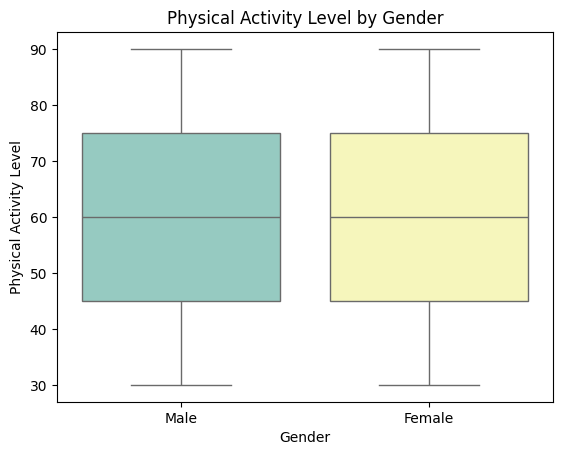

In [ ]:
sns.boxplot(data=df, x='Gender', y='Physical Activity Level', palette='Set3')
plt.title("Physical Activity Level by Gender")
plt.show()

Brief overview:

1. **Median level of physical activity:**
   - In men and women, the median is nearly identical (~60 minutes per day).

2. **Range:**
   - Physical activity levels range from 30 to 90 minutes for both sexes.

3. **Distribution:**
   - Males and females show similar variability, indicating an even distribution of activity between the sexes.

Physical activity levels do not differ significantly between males and females.


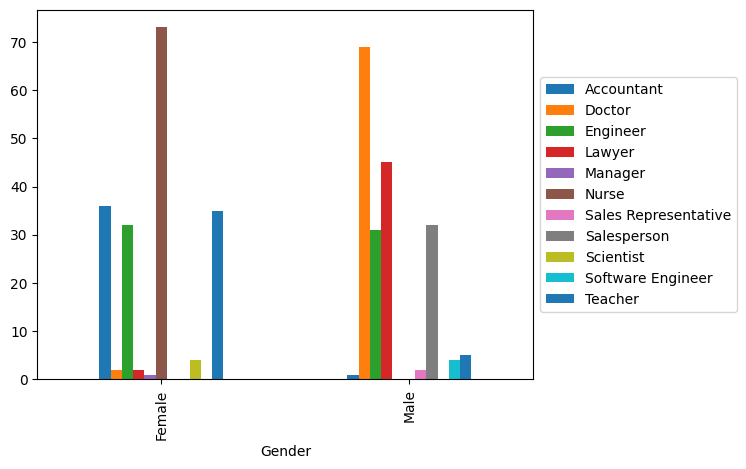

In [ ]:
pd.crosstab(df["Gender"],df["Occupation"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


The histogram shows the distribution of different occupations among men and women in the sample:

1. **Most represented occupations:**
   - Among **women**, the most prevalent occupation is **“Nurse” **.
   - Among **Men**, the predominant occupations are **“Doctor” (Physician)** and **“Sales Representative” (Sales Representative)**.

2. **Even distribution:**
   - Some occupations, such as **"Accountant ‘** and **’Teacher ”** have roughly equal representation among men and women.

3. **Specificity of occupations:**
   - The profession **"Scientist ”** is found only among males in the sample.
   - The **“Nurse” profession is predominantly female.

4. **General observation:**
   - There is a clear correlation between gender and occupational choice, which may be due to social or occupational tendencies.


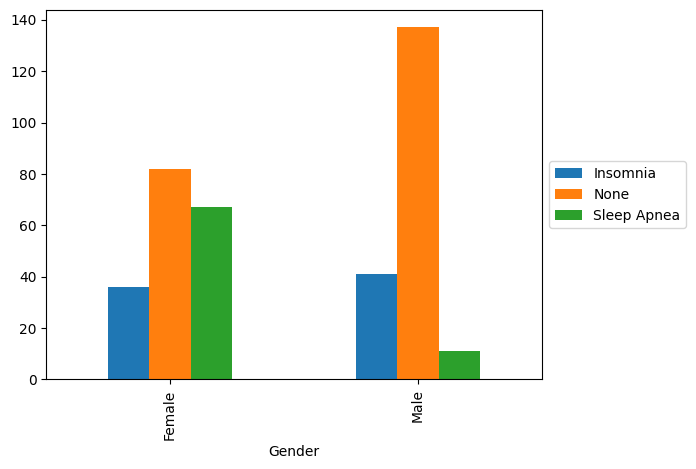

In [ ]:
pd.crosstab(df["Gender"],df["Sleep Disorder"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- Men are more likely than women to have no sleep disorders.
- Women are more susceptible to sleep apnea.
- Insomnia occurs with about equal frequency in both sexes.




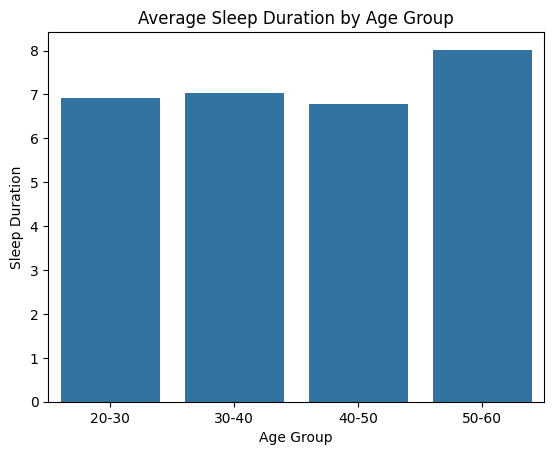

In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
sleep_duration_by_age = df.groupby('Age Group')['Sleep Duration'].mean().reset_index()
sns.barplot(data=sleep_duration_by_age, x='Age Group', y='Sleep Duration')
plt.title("Average Sleep Duration by Age Group")
plt.show()

Sleep duration increases with age, reaching a maximum in the 50-60 age group. This may be due to lifestyle changes or physiological needs.


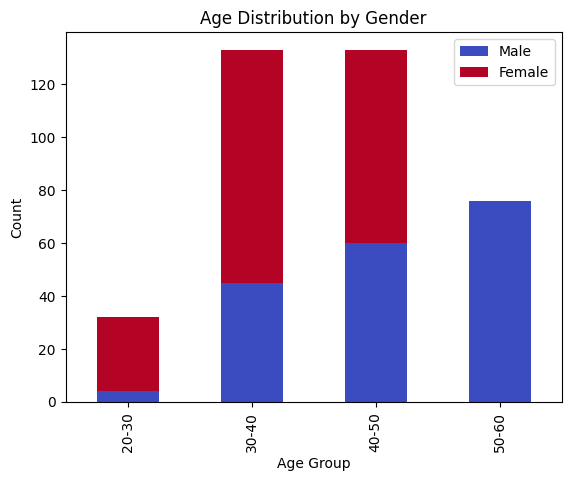

In [ ]:
age_gender = pd.crosstab(df['Age Group'], df['Gender'])
age_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Age Distribution by Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(["Male", "Female"], loc='upper right')
plt.show()

Brief overview:

1. **Group of 30-40 and 40-50 years:**.
   - Largest number of participants.
   - Women predominate over men in both age groups.

2. **Group 20-30 years old:**
   - Smallest number of participants.
   - Women are significantly overrepresented.

3. **Group 50-60 years old:**
   - Participants are represented only by men.

The age sample is unevenly distributed, with the largest number of participants in the middle age groups (30-50 years), where women are in the majority.

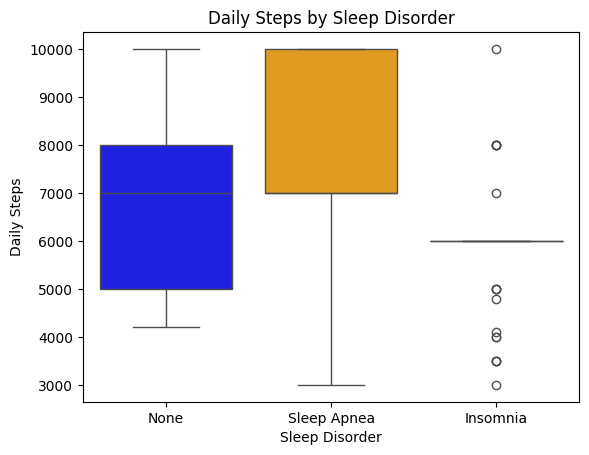

In [ ]:
sns.boxplot(
    data=df,
    x='Sleep Disorder',
    y='Daily Steps',
    palette={"Sleep Apnea": "orange", "Insomnia": "red", "None": "blue"}
)
plt.title("Daily Steps by Sleep Disorder")
plt.show()


People with insomnia are less active, whereas with apnea there is considerable variability in activity.

## Occupation

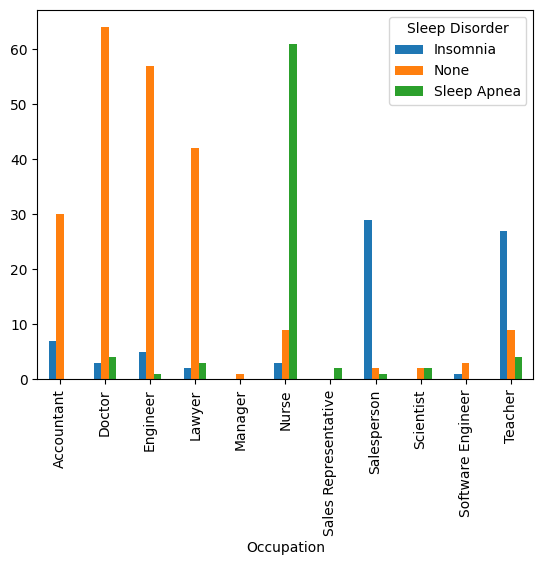

In [ ]:
pd.crosstab(df["Occupation"],df["Sleep Disorder"]).plot(kind="bar")
plt.show()


- Occupations with high responsibility (doctors, engineers) are more often associated with the absence of sleep disorders.
- Physically and emotionally demanding professions (nurses, sales representatives) have an increased risk of sleep disorders, especially sleep apnea.

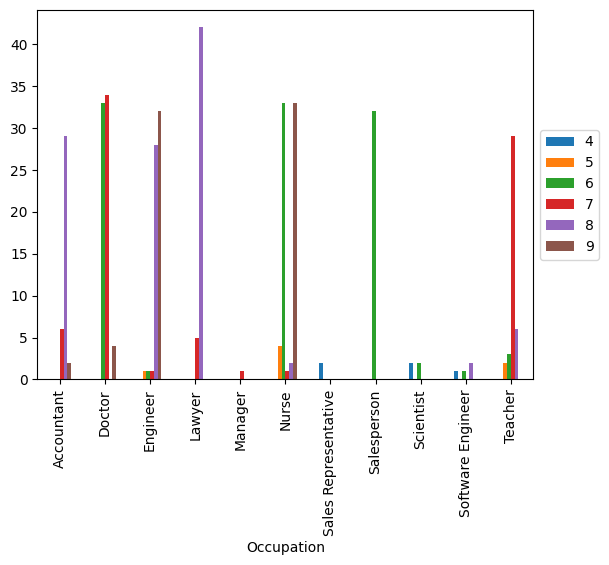

In [ ]:
pd.crosstab(df["Occupation"],df["Quality of Sleep"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- Professions with intellectual workload, such as Doctor and Lawyer, have better sleep quality.
- Professions with irregular schedules or high levels of stress, such as Nurse, show poorer sleep quality.

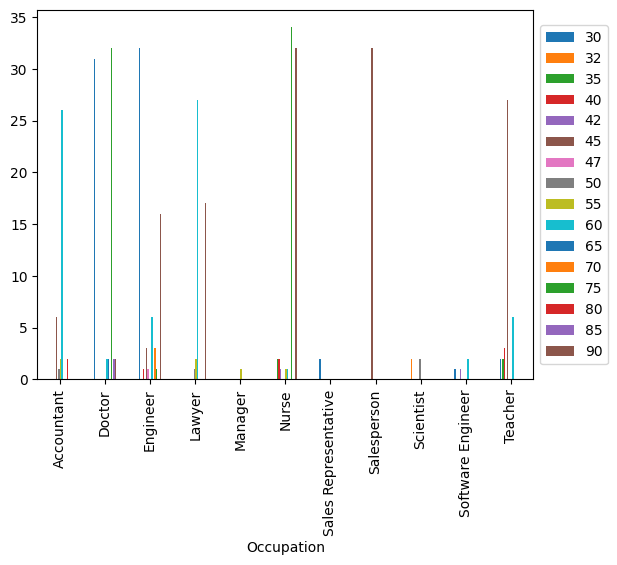

In [ ]:
pd.crosstab(df["Occupation"],df["Physical Activity Level"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- Occupations with physical activity, such as Nurse, have the highest activity level.
- Sedentary occupations such as Accountant and Software Engineer show the lowest level of physical activity.

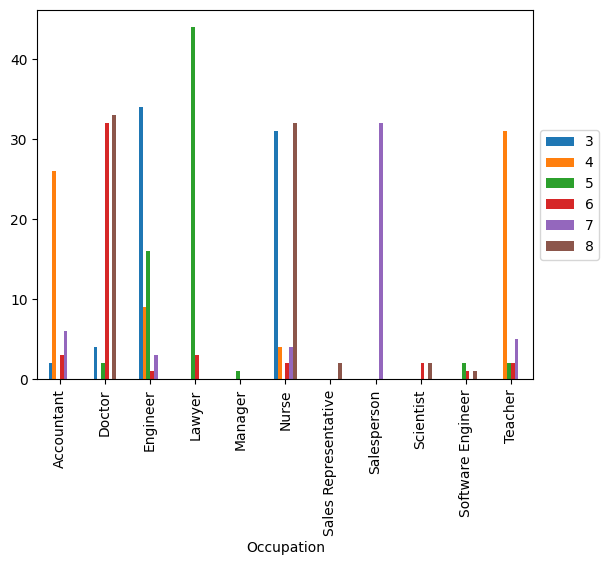

In [ ]:
pd.crosstab(df["Occupation"],df["Stress Level"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- Nurses and Lawyers experience the highest level of stress among all professions.
- Teachers and Scientists show lower stress levels, which may be related to a more controlled work environment.

## BMI

In [ ]:
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})

BMI_Category_count=df['BMI Category'].value_counts().reset_index()
BMI_Category_count

,BMI Category,count
0,Normal Weight,216
1,Overweight,148
2,Obese,10


### Анализируя по категории BMI

1. **Normal Weight (Нормальный вес):**
   - Большинство участников (216 человек, **57.8%**) имеют нормальный индекс массы тела.

2. **Overweight (Избыточный вес):**
   - 148 человек (**39.6%**) имеют избыточный вес.

3. **Obese (Ожирение):**
   - Лишь 10 человек (**2.7%**) страдают ожирением.

Кратко

- Большая часть выборки находится в категории **нормального веса**, что указывает на относительно здоровый образ жизни большинства участников.
- Значительная доля (почти 40%) находится в категории **избыточного веса**, что может быть риском для здоровья.
- Категория **ожирения** представлена минимально, что может указывать на редкость таких случаев в данной выборке.

In [ ]:
fig=px.pie(BMI_Category_count,values='count',names='BMI Category',title="the BMI Category")
fig.show()

### Summary of results:

- **57.8%** of participants are of normal weight.
- **39.6%** are overweight.
- Only **2.7%** are obese.

The majority of the sample are normal or overweight.

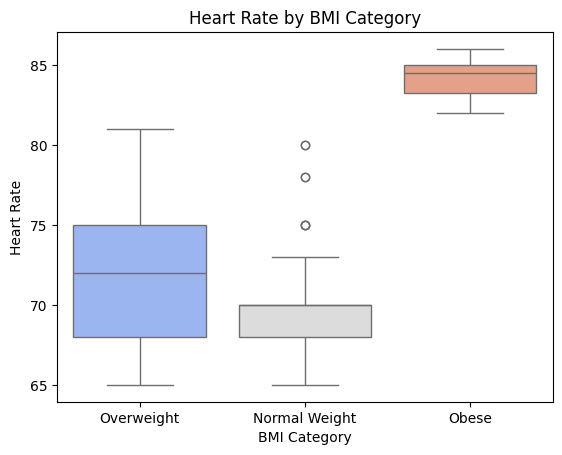

In [ ]:
sns.boxplot(data=df, x='BMI Category', y='Heart Rate', palette='coolwarm')
plt.title("Heart Rate by BMI Category")
plt.show()



1. **Obese (Obesity):** Highest heart rate (median about 85), with low variability.
2. **Overweight:** Moderate heart rate (median about 75), with wider variability.
3. **Normal Weight:** Lowest heart rate (median around 70), with minimal variability.

Conclusion:
Heart rate increases with increasing BMI category, which may be associated with increased cardiovascular workload.

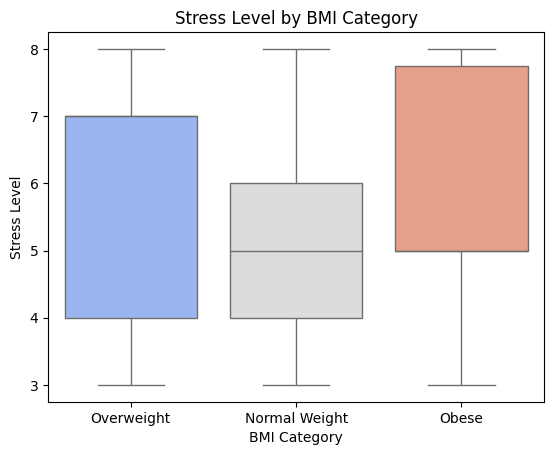

In [ ]:
sns.boxplot(data=df, x='BMI Category', y='Stress Level', palette='coolwarm')
plt.title("Stress Level by BMI Category")
plt.show()


Obese and overweight people are more likely to experience higher levels of stress, which may be related to factors affecting their health.

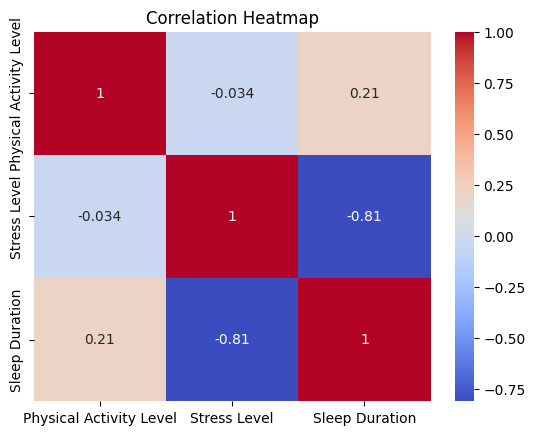

In [ ]:
corr_matrix = df[['Physical Activity Level', 'Stress Level', 'Sleep Duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

A brief item-by-item review:

1. **Stress Level and Sleep Duration:**
   - Strong negative correlation (**-0.81**): the higher the stress level, the shorter the sleep duration.

2. **Physical Activity Level and Sleep Duration:**
   - Weak positive correlation (**0.21**): physical activity may slightly increase sleep duration.

3. **Physical Activity Level and Stress Level:**
   - Very weak negative correlation (**-0.034**): physical activity has little or no effect on stress level.

Overall conclusion:
Stress level has the greatest impact on sleep duration, while physical activity has a negligible impact

## Classification

The general meaning for the classification task at hand is:
1. Separating “Blood Pressure” into two separate numerical attributes allows the model to better analyze the effect of each on the target variable.
2. Encoding categorical variables into numeric variables makes them suitable for use in machine learning algorithms, as models cannot deal with textual data directly


Split the Blood Pressure column (for example, the value “120/80”) into two separate numeric attributes:
- BloodPressure_Upper: Upper value (systolic pressure).
- BloodPressure_Lower: Lower value (diastolic pressure).


In [ ]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)

The Blood Pressure column has been replaced by two numeric attributes: BloodPressure_Upper and BloodPressure_Lower.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.drop("Age Group",axis=1,inplace=True)
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,27,9,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0
4,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0


Convert categorical variables (e.g., Gender, Occupation) into numeric values that can be used by a machine learning model.

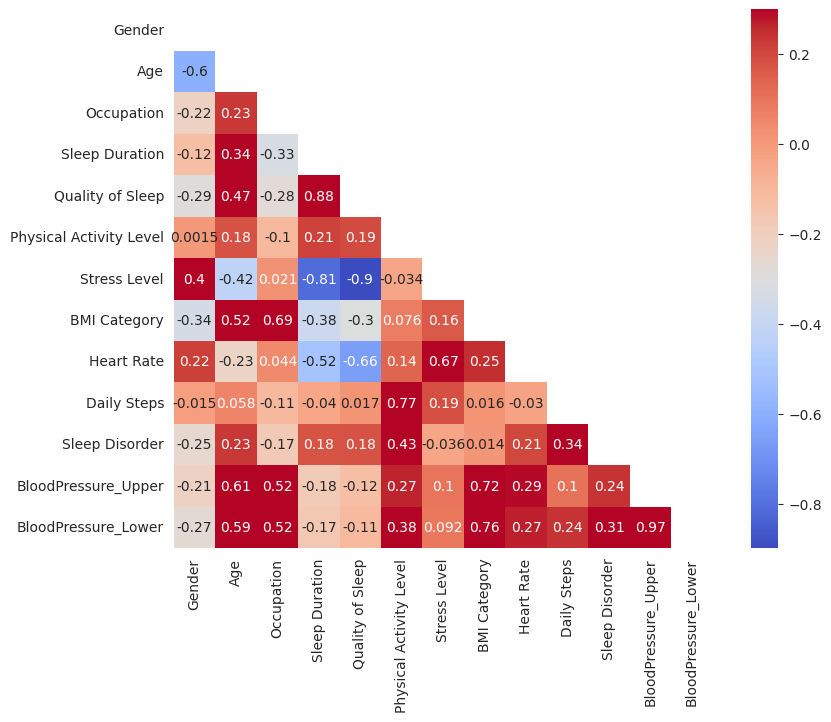

In [ ]:
def corr_vis(corr) :
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 7))
        g = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='coolwarm')
        g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)

num_corr = df.corr()
corr_vis(df.corr())

The correlation matrix shows a strong negative relationship between stress level and sleep duration, and a positive relationship between upper and lower blood pressure. Sleep quality is related to sleep duration, and BMI correlates with stress level and heart rate. The other correlations are weak or absent.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

# Data preparation
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

This code performs data preparation and splits the data into training and test samples for the classification task:

1. **Library Import:** Import classification models (logistic regression, random forest, gradient bousting and XGBoost) and metrics to evaluate their performance. We will use different methods to select the best result.

2. **Definition of features and target variable:**
   - `X`: Trait matrix (all columns except `Sleep Disorder`).
   - `y`: Target variable (`Sleep Disorder`) to be classified.

3. **Data partitioning:**.
   - Used `train_test_split` to split the data into training (80%) and test (20%) samples.
   - `X_train, y_train`: Data for model training.
   - `X_test, y_test`: Data for testing the models.

**Purpose:** Prepare data for training machine learning models and then evaluating their quality on a test sample.

In [ ]:
# Creation of the Logistics Model
lr_d = LogisticRegression()

# Model training
lr_d.fit(X_train, y_train)

LogisticRegression()

Build a logistic regression model that can predict the target variable (y) based on the attributes (X).

In [ ]:
from sklearn.metrics import accuracy_score
import plotly.express as px

Why needed:

- `accuracy_score`: To evaluate the quality of the model's predictions on a test sample.
- `plotly.express`: To create clear and interactive graphs that help to better interpret the results of the model.

In [ ]:
lr_pred_d = lr_d.predict(X_test)

We test how the model predicts the values of the target variable on data that was not used for training.

In [ ]:
# Classification reports for different algorithms
lr_d_report = classification_report(y_test, lr_pred_d)

# Graph classification reports
print("[ Logistic Regression report ]\n")
print(lr_d_report)

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.87      0.95      0.91        42
           2       1.00      0.83      0.91        18

    accuracy                           0.88        75
   macro avg       0.89      0.84      0.86        75
weighted avg       0.88      0.88      0.88        75



#### Summary of results:

1. **Classes:**
   - **0:** Accuracy 79%, completeness 73%, F1-measure 76%.
   - **1:** Accuracy 87%, completeness 95%, F1-measure 91%.
   - **2:** Accuracy 100%, fullness 83%, F1-measure 91%.

2. **Total accuracy:**
   - The model correctly classifies **88%** of all objects.

3. **Average values:**
   - **Macro avg:** Average of metrics across all classes (regardless of the number of objects in the classes).
   - **Weighted avg:** Weighted average of metrics (takes into account the number of objects in each class).


The logistic regression model does a good job of classifying the data. It confidently predicts “Insomnia” and “Sleep Apnea”, but may miss some cases of “None”. The results are consistent with our data where sleep disturbances have strong associations with traits such as stress level, physical activity and body mass index (BMI).

## ML Classification

In [ ]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X_train)
X_test_scaled = scaler_d.transform(X_test)


# Model building
lr_d = LogisticRegression()
rf_d = RandomForestClassifier()
gb_d = GradientBoostingClassifier()
xgb_d = XGBClassifier()

lr_d.fit(X_train_scaled, y_train)
rf_d.fit(X_train_scaled, y_train)
gb_d.fit(X_train_scaled, y_train)
xgb_d.fit(X_train_scaled, y_train)

lr_pred_d = lr_d.predict(X_test_scaled)
rf_pred_d = rf_d.predict(X_test_scaled)
gb_pred_d = gb_d.predict(X_test_scaled)
xgb_pred_d = xgb_d.predict(X_test_scaled)

The code prepares the data (feature scaling), trains four machine learning models (logistic regression, random forest, gradient bousting and XGBoost) on the training set and makes predictions on the test set. These models will then be compared on their performance.

In [ ]:
lr_d_report = classification_report(y_test, lr_pred_d)

print("[ Logistic Regression report ]\n")
print(lr_d_report)

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.91      0.95      0.93        42
           2       0.88      0.83      0.86        18

    accuracy                           0.91        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.91      0.91      0.91        75



The logistic regression model showed high accuracy (91%) and balanced metrics for all classes, with the best results for the “None” and “Insomnia” classes.

In [ ]:
rf_d_report = classification_report(y_test, rf_pred_d)

print("[ Random forest report ]\n")
print(rf_d_report)

[ Random forest report ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.93      1.00      0.97        42
           2       1.00      0.89      0.94        18

    accuracy                           0.95        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.95      0.95      0.95        75



The random forest model showed excellent results with 95% accuracy, high metrics for all classes and best completeness for Insomnia and Sleep Apnea classes.

In [ ]:
gb_d_report = classification_report(y_test, gb_pred_d)

print("[ Gradient Boosting report ]\n")
print(gb_d_report)

[ Gradient Boosting report ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.93      1.00      0.97        42
           2       1.00      0.89      0.94        18

    accuracy                           0.95        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.95      0.95      0.95        75



The gradient bousting model showed high accuracy (95%) and balanced metrics similar to a random forest, with excellent completeness for Insomnia and Sleep Apnea classes.

In [ ]:
xgb_d_report = classification_report(y_test, xgb_pred_d)

print("[ XGB report ]\n")
print(xgb_d_report)

[ XGB report ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.93      1.00      0.97        42
           2       1.00      0.89      0.94        18

    accuracy                           0.95        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.95      0.95      0.95        75



The XGBoost model showed 95% accuracy with excellent metrics, especially high completeness for Insomnia and Sleep Apnea classes, similar to gradient bousting and random forest.

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred_d)
rf_accuracy = accuracy_score(y_test, rf_pred_d)
gb_accuracy = accuracy_score(y_test, gb_pred_d)
xgb_accuracy = accuracy_score(y_test, xgb_pred_d)

accuracy_scores = [lr_accuracy,rf_accuracy,gb_accuracy,xgb_accuracy]
print(accuracy_scores)

fig = px.bar(x=['Logistic Regression','Random Forest','Gradient Boosting','XGB'], y=accuracy_scores)
fig.show()

[0.9066666666666666, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667]


### Output of classification models:

1. **Models accuracy:**
   - Logistic regression:**90.7%**
   - Random forest: **94.7%**
   - Gradient bousting: **94.7%**
   - XGBoost: **94.7%**

2. **Analysis:**
   - The three models (Random Forest, Gradient Bounding, XGBoost) showed the same accuracy (**94.7%**) and outperform logistic regression.
   - These models perform better given the complexity of the data.

3. **Selection of the best model:**
   - For classification, one can choose **any of the three models with an accuracy of 94.7%**. XGBoost may be the preferred choice because of its high performance on big data and hyperparameter tuning capabilities.

### **Conclusion:**

In this work, data related to sleep disorders were classified using different machine learning methods: logistic regression, random forest, gradient bousting and XGBoost. All stages of analysis, from data preprocessing to model evaluation, showed that the task was successfully accomplished with a high level of accuracy.

During the data preparation phase, important transformations such as blood pressure column splitting, categorical feature coding, and numerical data scaling were performed to ensure correct model training. In addition, data analysis revealed significant patterns, such as correlations between sleep quality, stress levels, physical activity, and BMI. These correlations confirm that the selected features adequately explain the target variable.

Classification results showed that random forest, gradient bousting and XGBoost models achieved equally high accuracy of 94.7%, surpassing logistic regression (90.7%). All models demonstrated balanced metrics for all classes (“None”, “Insomnia”, “Sleep Apnea”), but XGBoost stands out due to its versatility and ability to handle more complex data.

Thus, XGBoost can be considered the optimal choice for this task, especially if scaling or customization on new data will be required. Overall, the goal of classifying sleep disorder data with high accuracy was fully achieved, and the results demonstrate that machine learning models can effectively solve medical and behavioral analysis problems.